In [50]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
#import sqlite
%matplotlib inline

In [ ]:
# Python SQL toolkit and Object Relational Mapper packages
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import sqlite3

In [ ]:
#wip

#con = sqlite3.connect('postgres:///creditCardFraud')
#df = pd.read_sql_table('credit_card_fraud', con) 

In [2]:
#Reading

#Need to read from .sql file
df=pd.read_csv(r"C:\Users\nrhl1\OneDrive\Desktop\UTBootcamp\Challenges\credit_card_fraud_detection\Resources\credit_card_fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Looking at our data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,...,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,40137.043347,-2.448570,1.891980,-3.051347,2.439058,-1.547403,-0.565127,-2.708214,0.259582,-1.287863,...,0.351398,-0.045354,-0.036705,-0.047224,0.087052,0.027725,0.094235,0.027836,95.753579,0.495968
std,52517.905471,5.390114,3.584929,6.420397,3.039731,4.189808,1.801496,5.845056,4.830526,2.262868,...,2.776311,1.141864,1.144442,0.586459,0.638865,0.468136,1.000252,0.441261,239.252178,0.500236
min,0.000000,-30.552380,-12.114213,-31.103685,-4.515824,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.243924,-7.263482,-2.733887,0.000000,0.000000
25%,167.750000,-2.762972,0.085200,-5.068323,0.337990,-1.688687,-1.437809,-3.031843,-0.168866,-2.196967,...,-0.174571,-0.533915,-0.226073,-0.415078,-0.212147,-0.295464,-0.039747,-0.049771,1.790000,0.000000
50%,365.500000,-0.776719,0.943748,-0.293789,1.375888,-0.380261,-0.509203,-0.425244,0.153152,-0.573701,...,0.090010,-0.031383,-0.050720,0.027849,0.127459,-0.014283,0.063142,0.037457,15.910000,0.000000
75%,74454.750000,0.886255,2.720030,0.944081,4.166857,0.427009,0.241343,0.308074,0.800725,0.118491,...,0.699437,0.440345,0.140485,0.392898,0.455121,0.309947,0.452145,0.213974,90.800000,1.000000
max,170348.000000,2.132386,22.057729,3.772857,12.114672,11.095089,6.474115,5.802537,20.007208,5.436633,...,27.202839,8.361985,5.466230,1.215279,2.208209,3.065576,3.052358,1.779364,3828.040000,1.000000


In [15]:
# Create scaler instance
scaler = StandardScaler()

#X needs to be V1-V28
X = df.iloc[:, 1:29]

#y needs to be "Class" that states if transaction was fraud or not
y = df["Class"]

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Fit the scaler
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#df['Class'].value_counts()

In [ ]:
#sns.countplot(df['Class'])

In [ ]:
# non_fraud = df[df['Class']==0]
# fraud = df[df['Class']==1]

# non_fraud = non_fraud.sample(frac=1)

# non_fraud = non_fraud[:492]

# new_df = pd.concat([non_fraud,fraud])
# new_df = new_df.sample(frac=1)

In [ ]:
#new_df['Class'].value_counts()

In [ ]:
#sns.countplot(new_df['Class'])

In [ ]:
# Making Training data sets 
#X = new_df.drop('Class',axis=1)
#y = new_df['Class']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [45]:
#Logistic Regression model
##https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       135
           1       0.96      0.95      0.95       113

    accuracy                           0.96       248
   macro avg       0.96      0.95      0.96       248
weighted avg       0.96      0.96      0.96       248




[[130   5]
 [  6 107]]


accuracy is -->  95.56


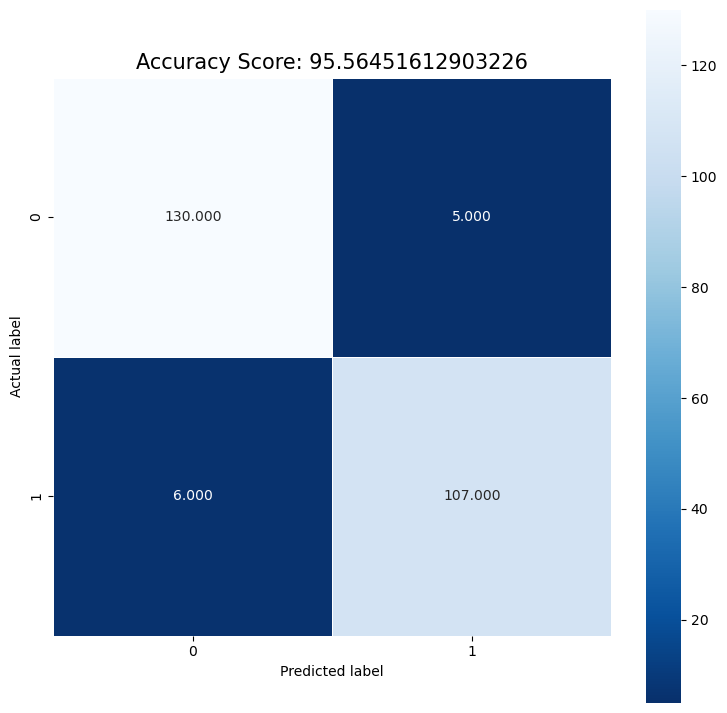

In [52]:
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
from sklearn import metrics
#cm = metrics.confusion_matrix(y_test, pred)
cr = confusion_matrix(y_test, pred)

plt.figure(figsize=(9,9))
sns.heatmap(cr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,pred)*100,2)
plt.title(all_sample_title, size = 15);

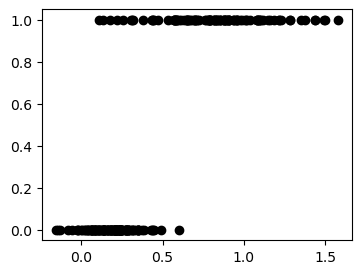

In [42]:
from scipy.special import expit
plt.figure(1, figsize=(4, 3))
#plt.clf()
plt.scatter(pred ,y_test, label="example data", color="black", zorder=20)
plt.show()
#loss = expit(X_test * lr.coef_ + lr.intercept_).ravel()
#plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

In [17]:
# Making DecisionTree model
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

pred = dt.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       135
           1       0.93      0.92      0.92       113

    accuracy                           0.93       248
   macro avg       0.93      0.93      0.93       248
weighted avg       0.93      0.93      0.93       248




[[127   8]
 [  9 104]]


accuracy is -->  93.15


In [18]:

#Random Forestclassifier model 
from sklearn.ensemble import RandomForestClassifier,IsolationForest

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

pred=rf.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       135
           1       0.97      0.95      0.96       113

    accuracy                           0.96       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.96      0.96      0.96       248




[[132   3]
 [  6 107]]


accuracy is -->  96.37


In [ ]:
# Artificial Neural Network model 


In [ ]:
#Naive Bayes model 


In [19]:
#Keras sequential model 
#Random Forestclassifier model 
pred= tf.keras.models.Sequential()

# Build the Neural Network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict_classes(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nAccuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))

NameError: name 'Sequential' is not defined